In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_column', None)

In [9]:
df = pd.read_csv('data/survey_results_public.csv', low_memory=False)
df.head(1)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy


<h2>Plotting functions</h2>

In [53]:
def plot_categorical_count(df, column, title, limit=2, xtick_rotation='horizontal'):
    column_count = df[column].value_counts()[:limit]
    
    plt.figure(figsize=(14,8))
    sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
    plt.title(title)
    plt.xticks(rotation=xtick_rotation)

<h2>Top 10 Countries</h2>

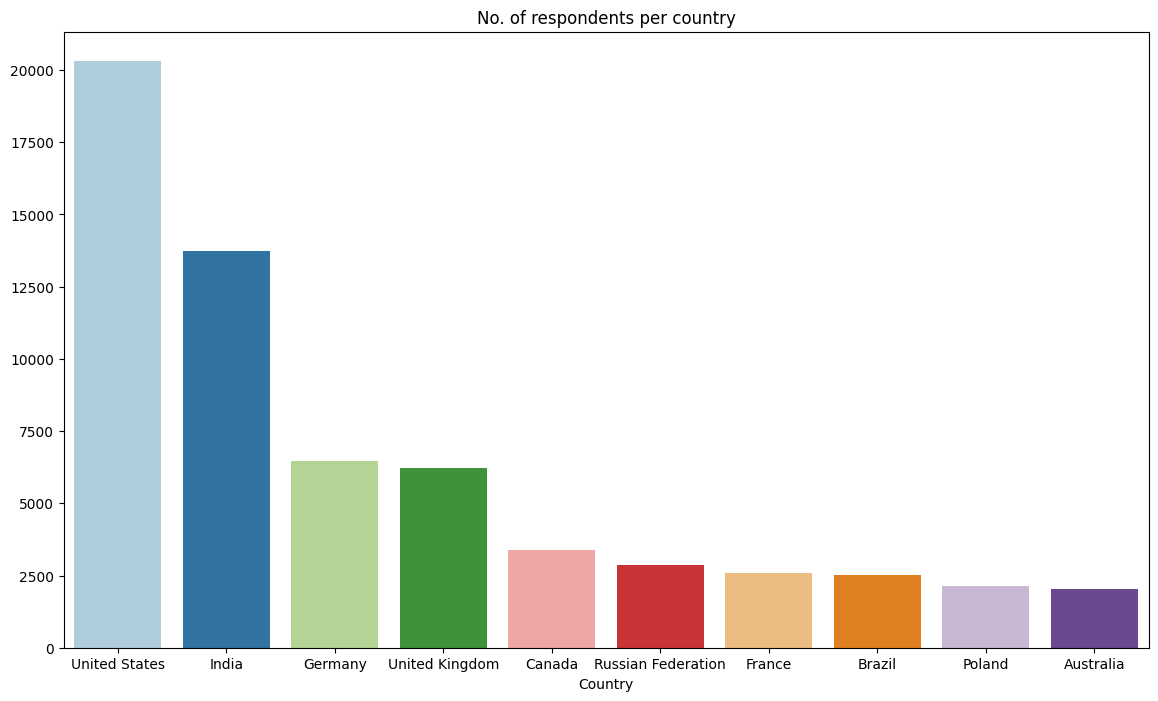

In [54]:
plot_categorical_count(df, 'Country', title='No. of respondents per country', limit=10)

Majority of the respondents are from the USA.

<h2>Code as a hobby</h2>

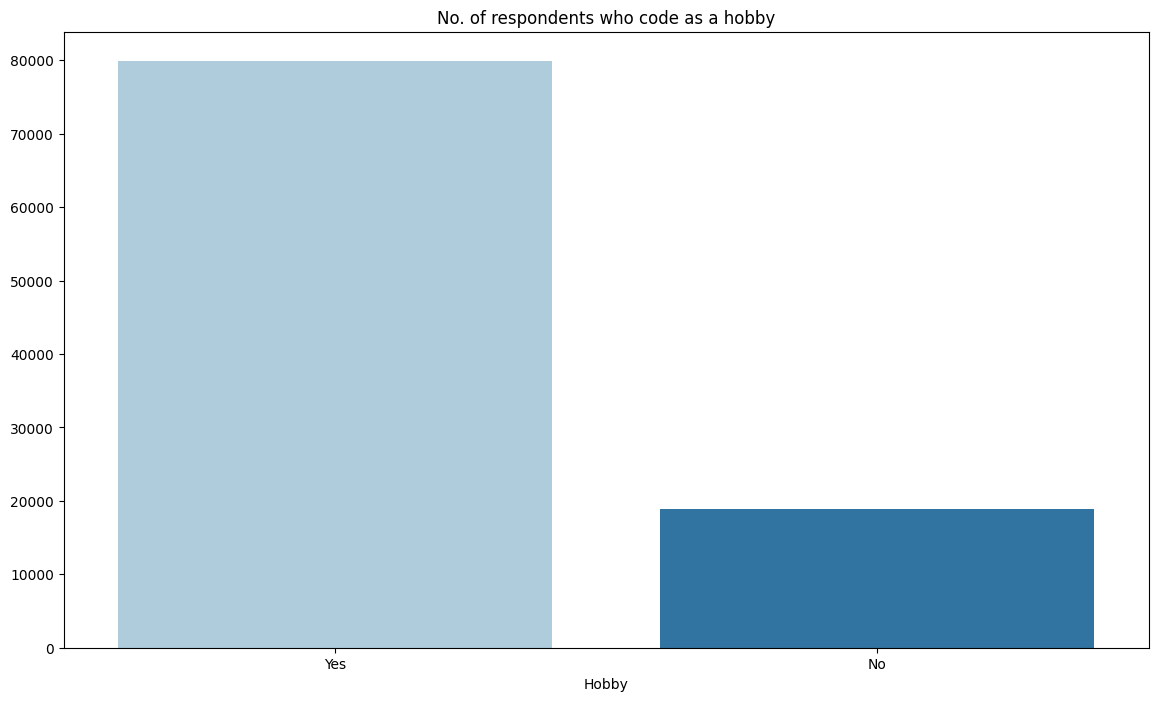

In [55]:
plot_categorical_count(df, 'Hobby', title='No. of respondents who code as a hobby')

Majority of the respondents code as a hobby.

<h2>Open Source Contributor</h2>

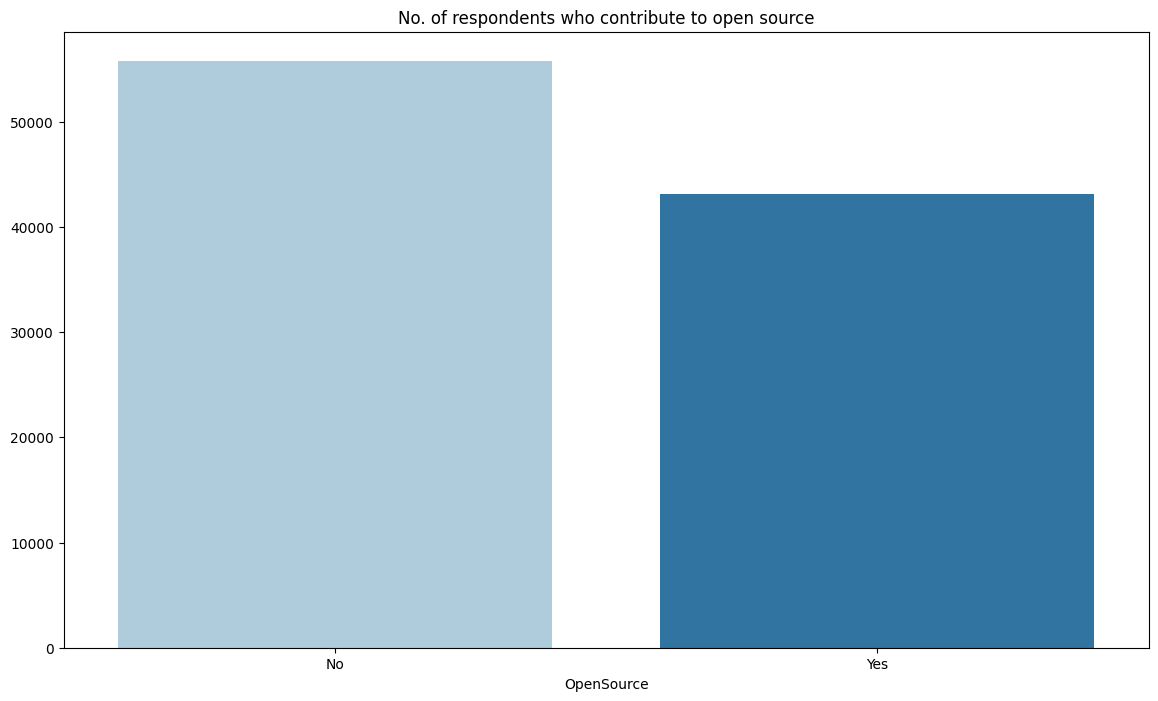

In [56]:
plot_categorical_count(df, 'OpenSource', title='No. of respondents who contribute to open source')

Majority of respondents do not contribute to open source.

<h2>Does coding as a hobby affect contribution to open source?</h2>

Text(0.5, 1.0, 'Distribution of the respondents who code as a hobby and contribute to open source')

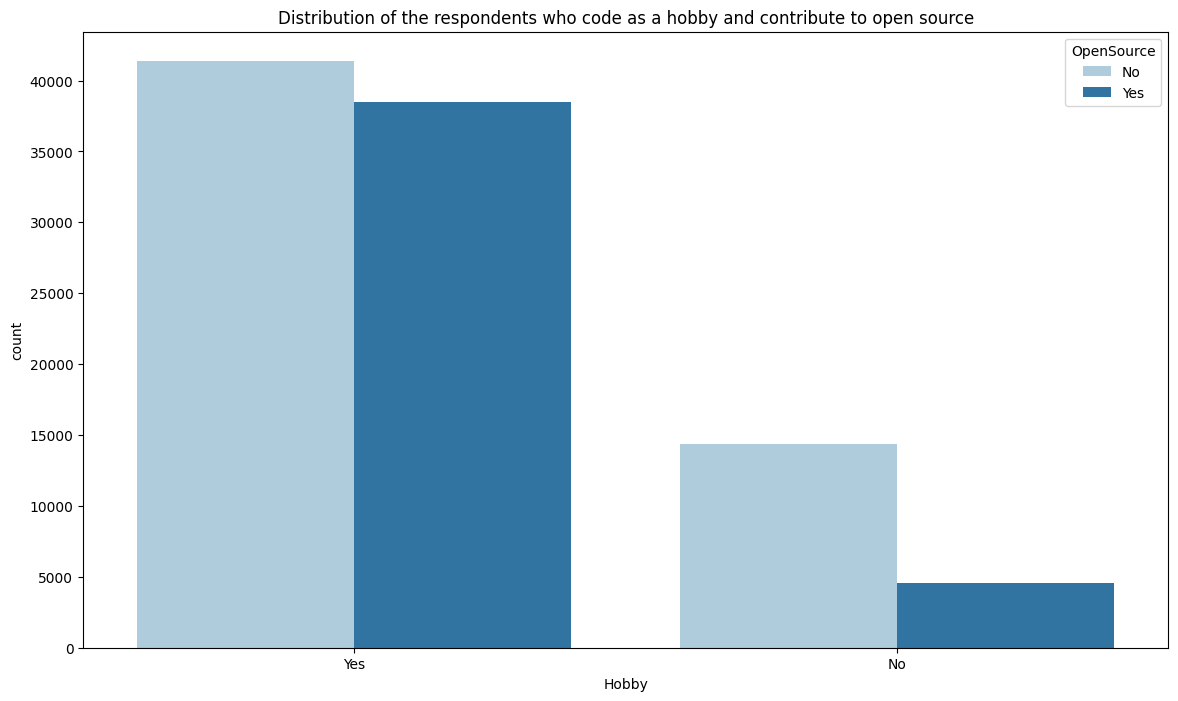

In [31]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='Hobby', hue='OpenSource', palette='Paired')
plt.title('Distribution of the respondents who code as a hobby and contribute to open source')

Those who code as a hobby are more likely to contribute to open source.

<h2>Student or not?</h2>

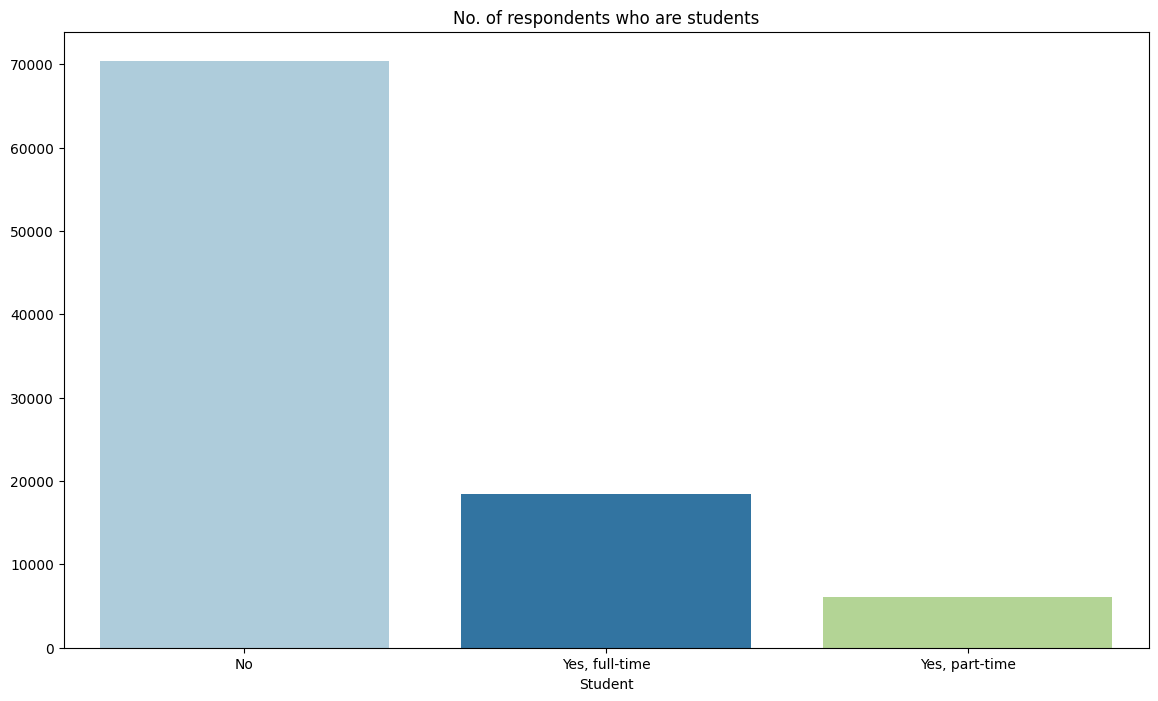

In [57]:
plot_categorical_count(df, 'Student', title='No. of respondents who are students', limit=3)

Majority of the respondents were not students.

<h2>Employment Status</h2>

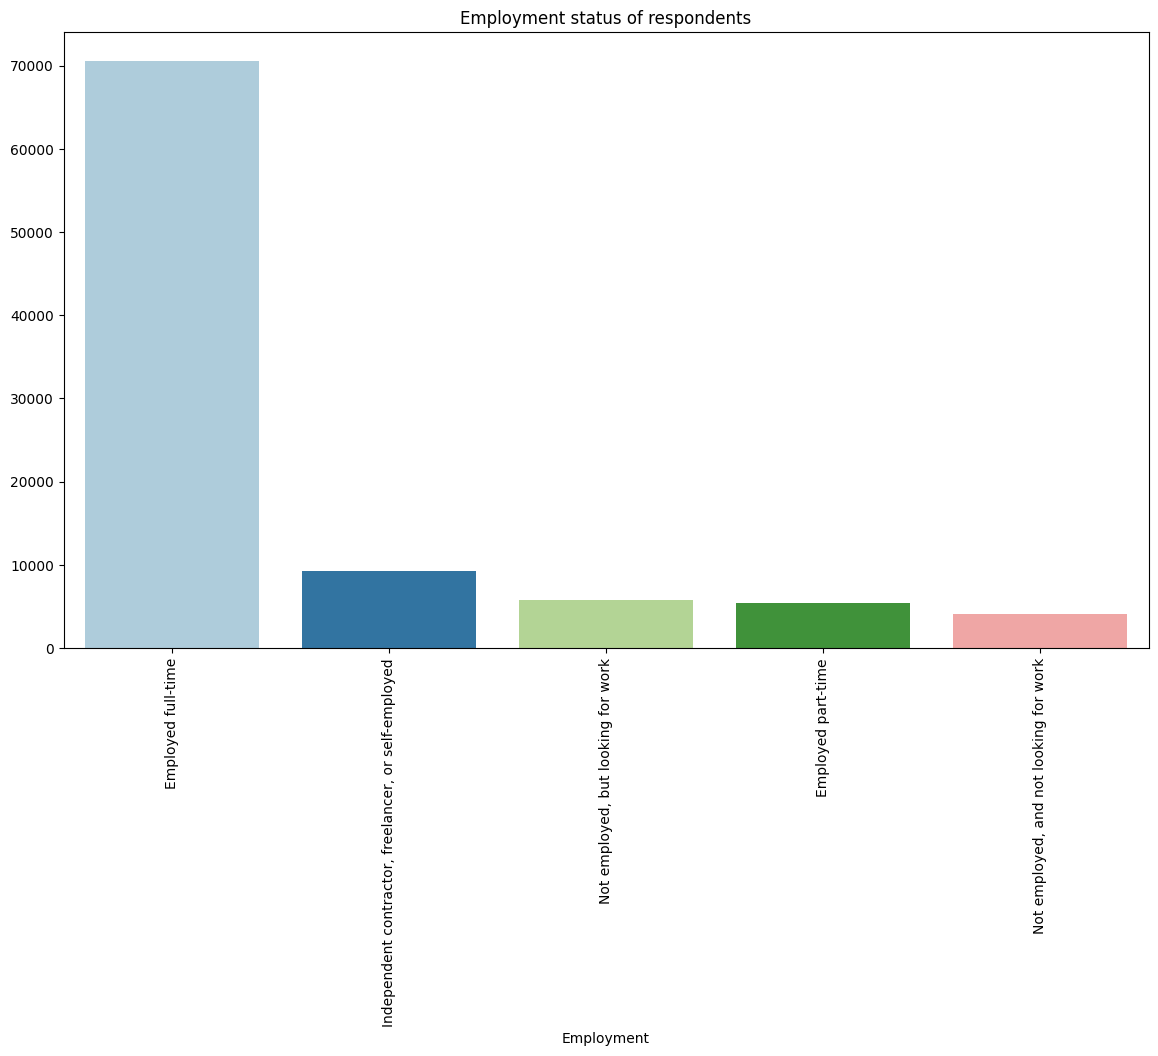

In [58]:
plot_categorical_count(df, 'Employment', title='Employment status of respondents', limit=5, xtick_rotation='vertical')

Majority of respondents are employeed fulltime.

<h2>Gender</h2>

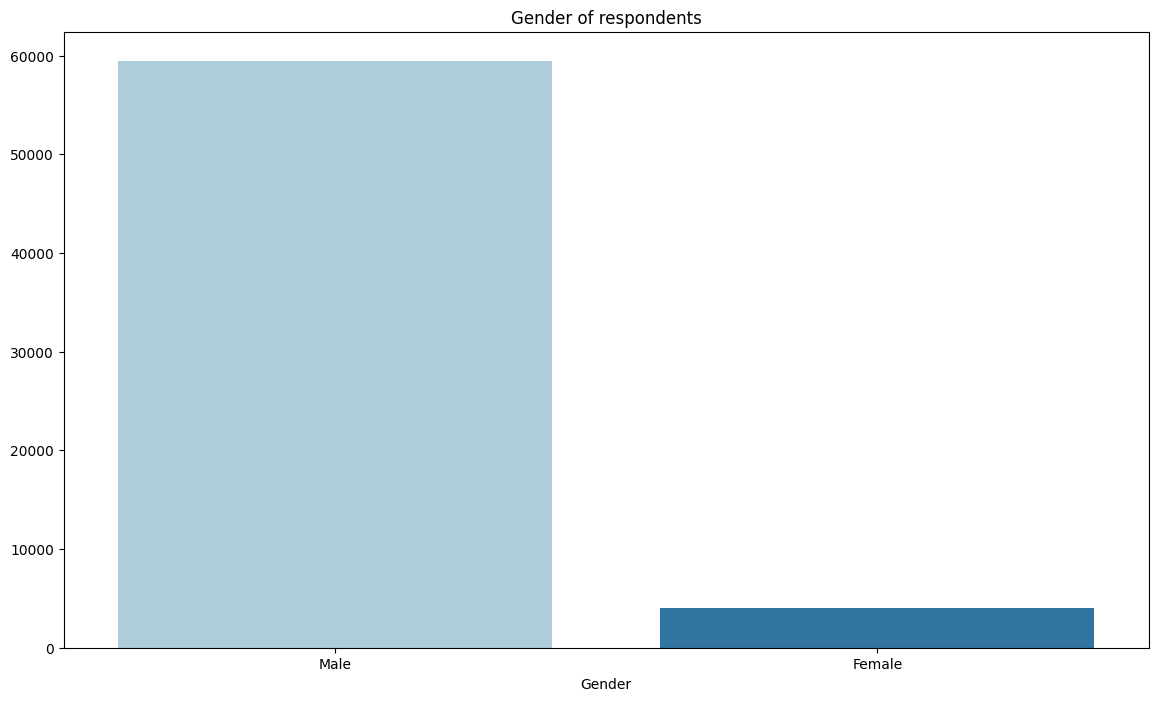

In [60]:
plot_categorical_count(df, 'Gender', title='Gender of respondents')

Majority of respondents are male.

<h2>When do developers wake up?</h2>

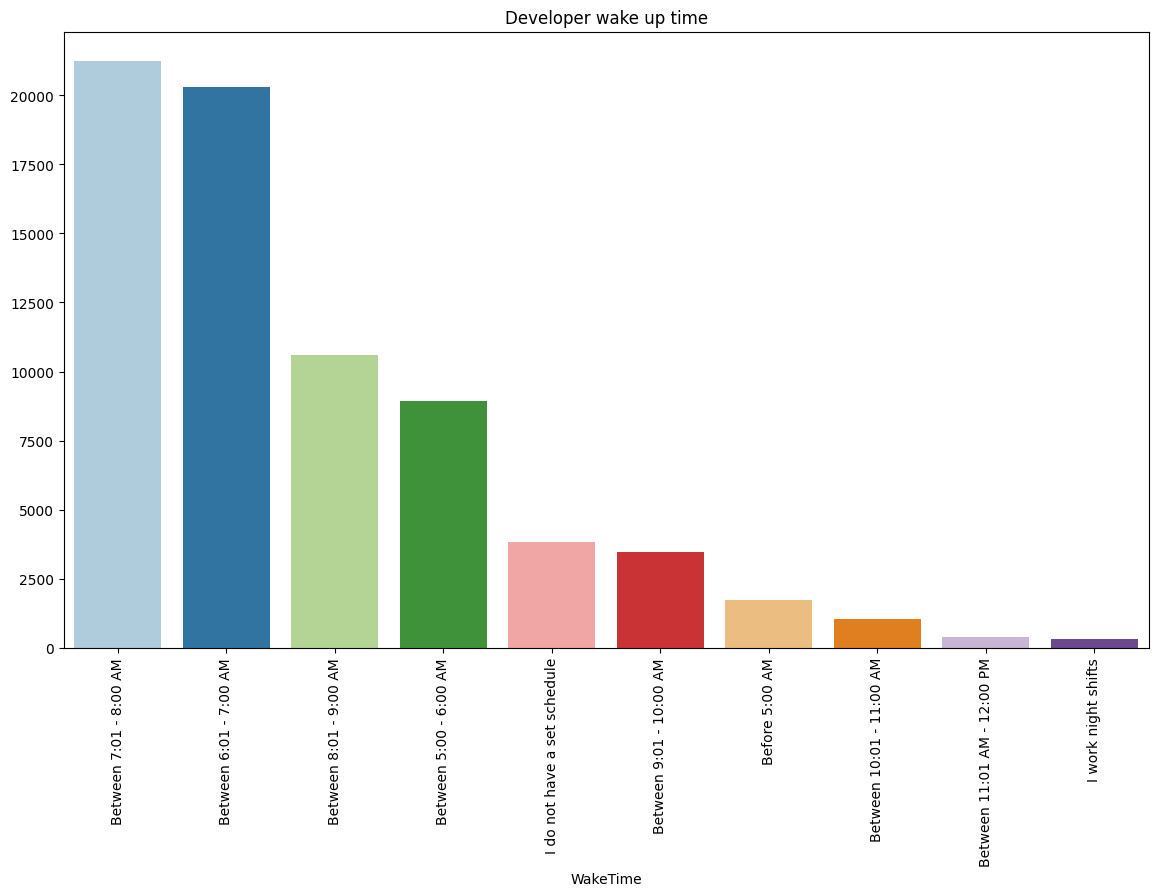

In [69]:
plot_categorical_count(df, 'WakeTime', title='Developer wake up time', limit=10, xtick_rotation='vertical')

Majority of developers wake up between 6am and 8am.

<h2>What bachelor degrees do developers have?</h2>

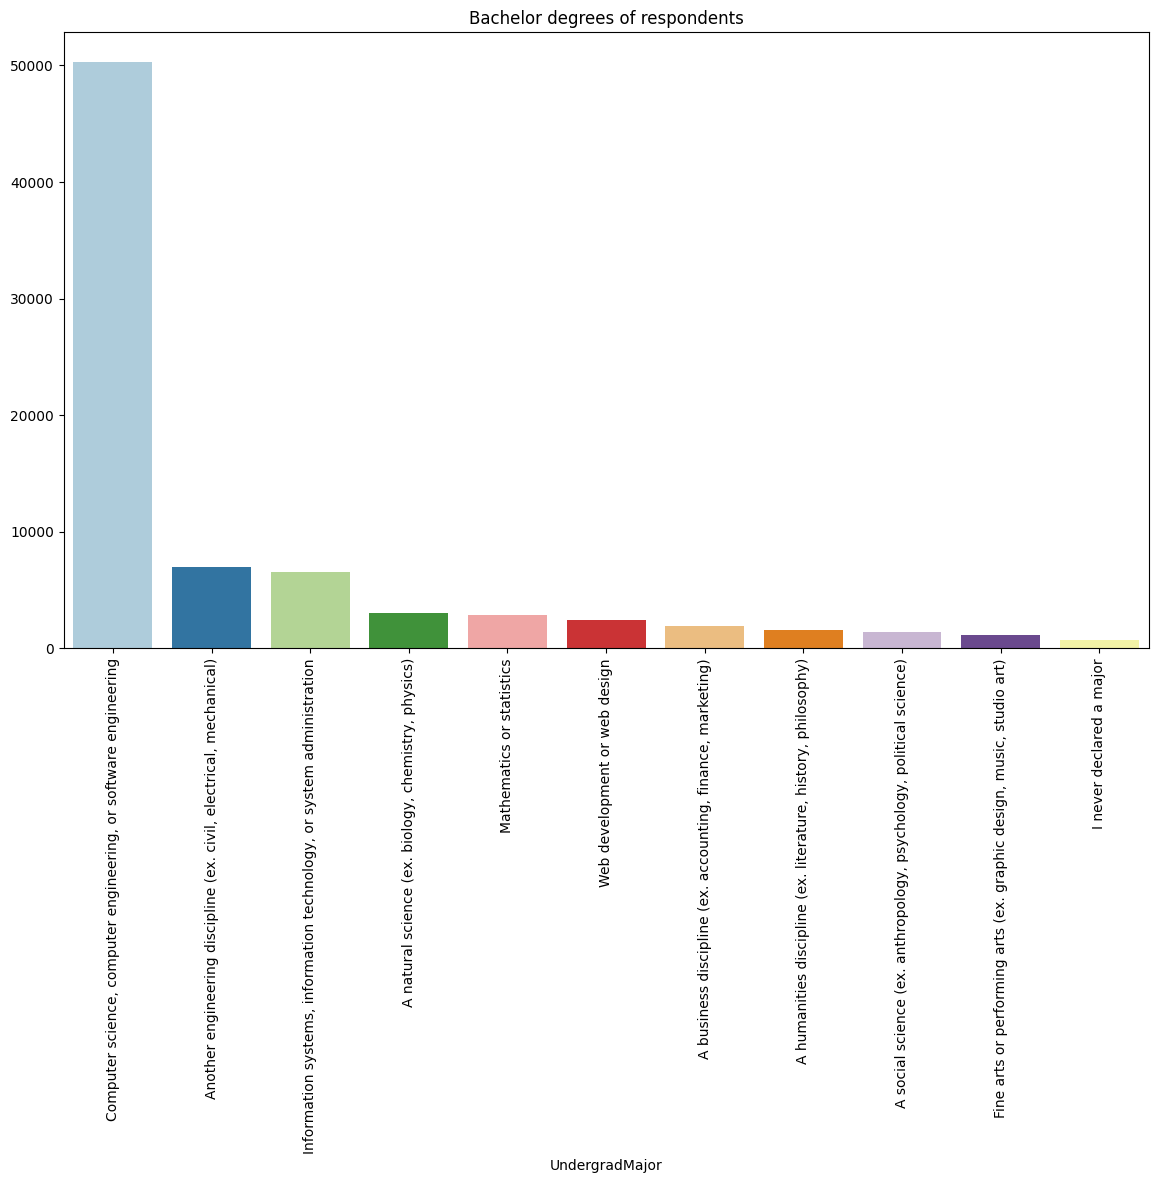

In [72]:
plot_categorical_count(df, 'UndergradMajor', 'Bachelor degrees of respondents', limit=11, xtick_rotation='vertical')

Majority of respondents have a bachelor degree in Computer Science.

<h2>Job Satisfaction</h2>

<h2>Among the top 10 countries, which one has the highest job satisfaction?</h2>

In [73]:
top10_list = list(df['Country'].value_counts()[:10].index)

def sat_dis(row):
    if 'dissatisfied' in row:
        return 'Dissatisfied'
    else:
        return 'Satisfied'
    
df['sat_or_dis'] = df['JobSatisfaction'].dropna().map(sat_dis)

top10_df = df.where(df['Country'].isin(top10_list))

sat_count = pd.DataFrame()
names = []

for name, group in top10_df.groupby('Country'):
    names.append(name)
    
sat_count['Country'] = names

sat_count

,Country
0,Australia
1,Brazil
2,Canada
3,France
4,Germany
5,India
6,Poland
7,Russian Federation
8,United Kingdom
9,United States


Text(0.5, 1.0, 'Number of respondents satisfied with their jobs')

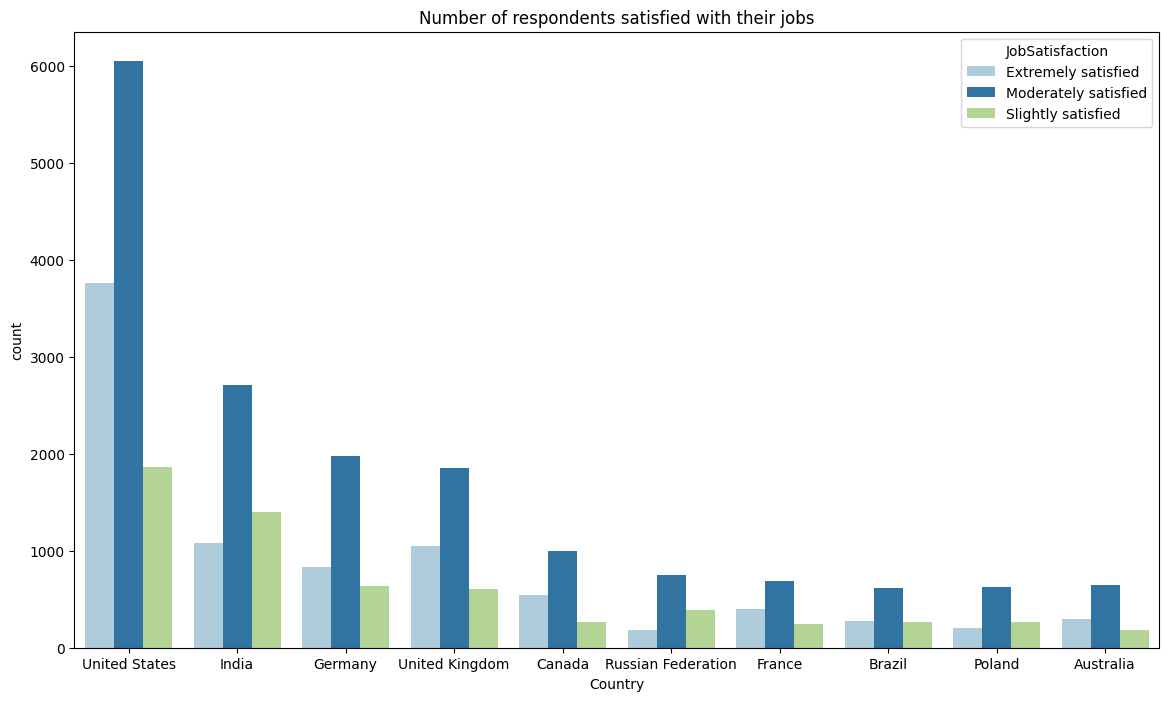

In [80]:
criteria1 = df['JobSatisfaction'] == 'Extremely satisfied'
criteria2 = df['JobSatisfaction'] == 'Moderately satisfied'
criteria3 = df['JobSatisfaction'] == 'Slightly satisfied'
final_criteria = criteria1 | criteria2 |criteria3

data = df[final_criteria]

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='Country', hue='JobSatisfaction', palette='Paired', order=df['Country'].value_counts()[:10].index)
plt.title('Number of respondents satisfied with their jobs')

Majority of developers among the top 10 countries are moderately satisfied with their jobs.

<h2>Job dissatisfaction</h2>

Text(0.5, 1.0, 'Number of respondents dissatisfied with their jobs')

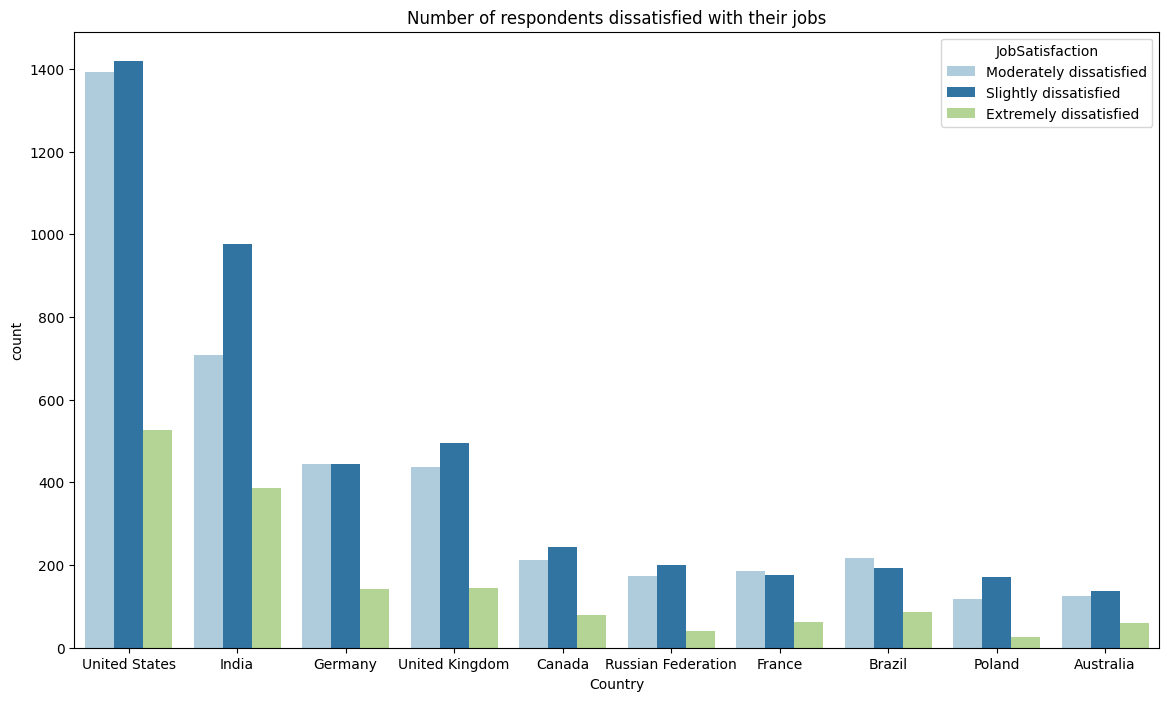

In [83]:
criteria1 = df['JobSatisfaction'] == 'Extremely dissatisfied'
criteria2 = df['JobSatisfaction'] == 'Moderately dissatisfied'
criteria3 = df['JobSatisfaction'] == 'Slightly dissatisfied'
final_criteria = criteria1 | criteria2 |criteria3

data = df[final_criteria]

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='Country', hue='JobSatisfaction', palette='Paired', order=df['Country'].value_counts()[:10].index)
plt.title('Number of respondents dissatisfied with their jobs')

Less than 1400 respondents in the top 10 countries are dissatisfied with their jobs.

<h2>Career Satisfaction</h2>

Text(0.5, 1.0, 'Number of respondents satisfied with their careers')

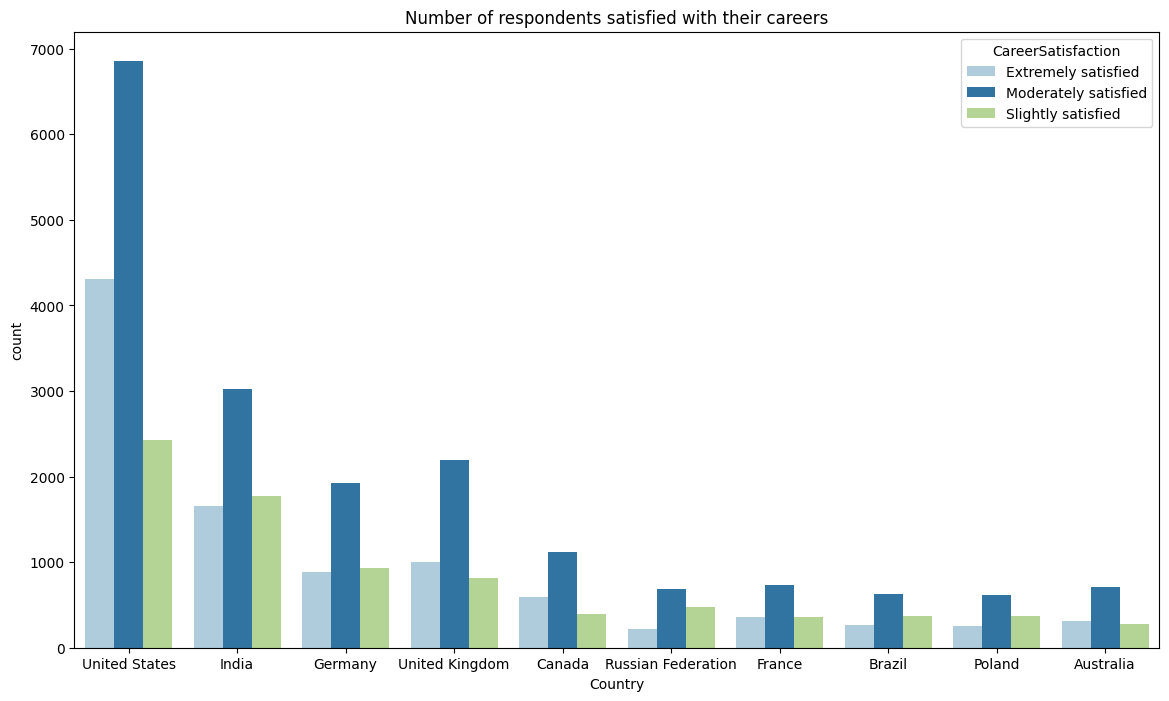

In [82]:
criteria1 = df['CareerSatisfaction'] == 'Extremely satisfied'
criteria2 = df['CareerSatisfaction'] == 'Moderately satisfied'
criteria3 = df['CareerSatisfaction'] == 'Slightly satisfied'
final_criteria = criteria1 | criteria2 |criteria3

data = df[final_criteria]

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='Country', hue='CareerSatisfaction', palette='Paired', order=df['Country'].value_counts()[:10].index)
plt.title('Number of respondents satisfied with their careers')

<h2>Salaries</h2>

Text(0.5, 1.0, 'Distribution of salaries in the top 10 countries')

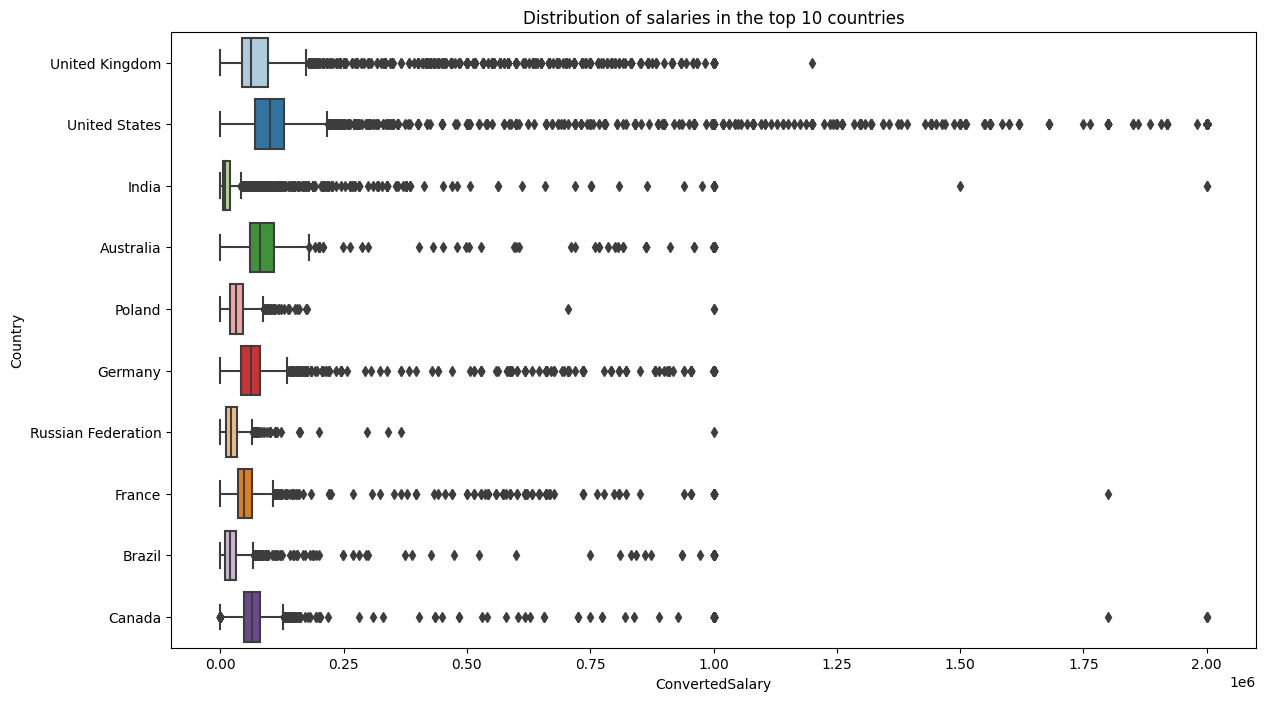

In [87]:
plt.figure(figsize=(14,8))
data = top10_df
sns.boxplot(data=data, x='ConvertedSalary', y='Country', palette='Paired')
plt.title('Distribution of salaries in the top 10 countries')

<h2>Productivity Time</h2>

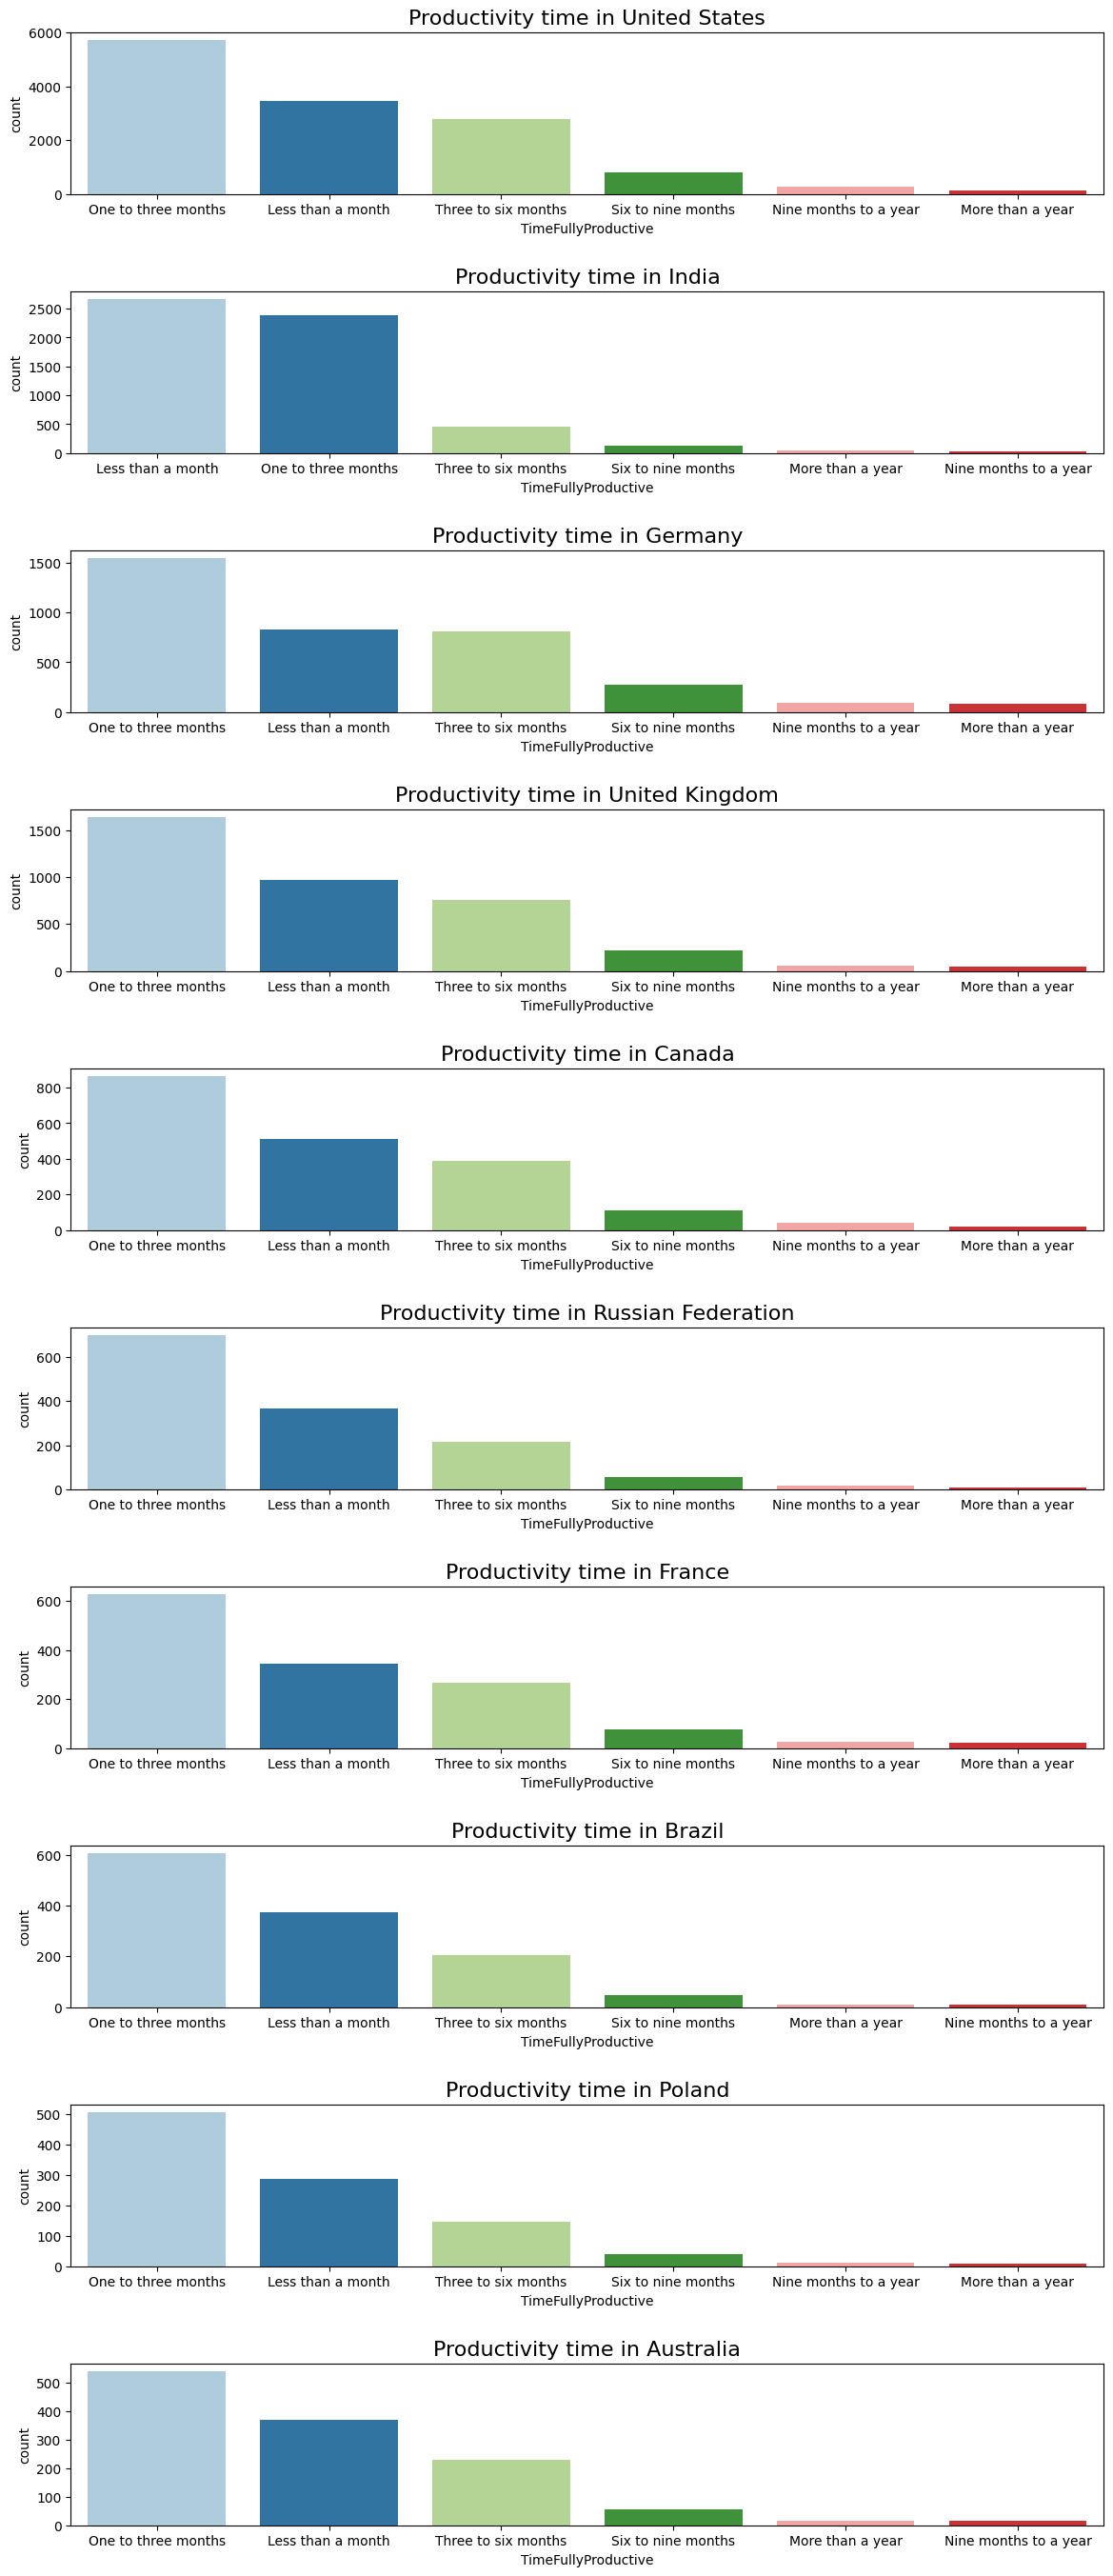

In [100]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='TimeFullyProductive', palette='Paired', ax=ax, order=data['TimeFullyProductive'].value_counts().index)
    ax.set_title('Productivity time in {}'.format(country), fontsize=16)
    
plt.subplots_adjust(hspace=.6)

In [102]:
dfKenya = df[df['Country'] == 'Kenya']
dfKenya.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,sat_or_dis
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,Satisf

<h2>How many Kenyans code as a hobby?</h2>

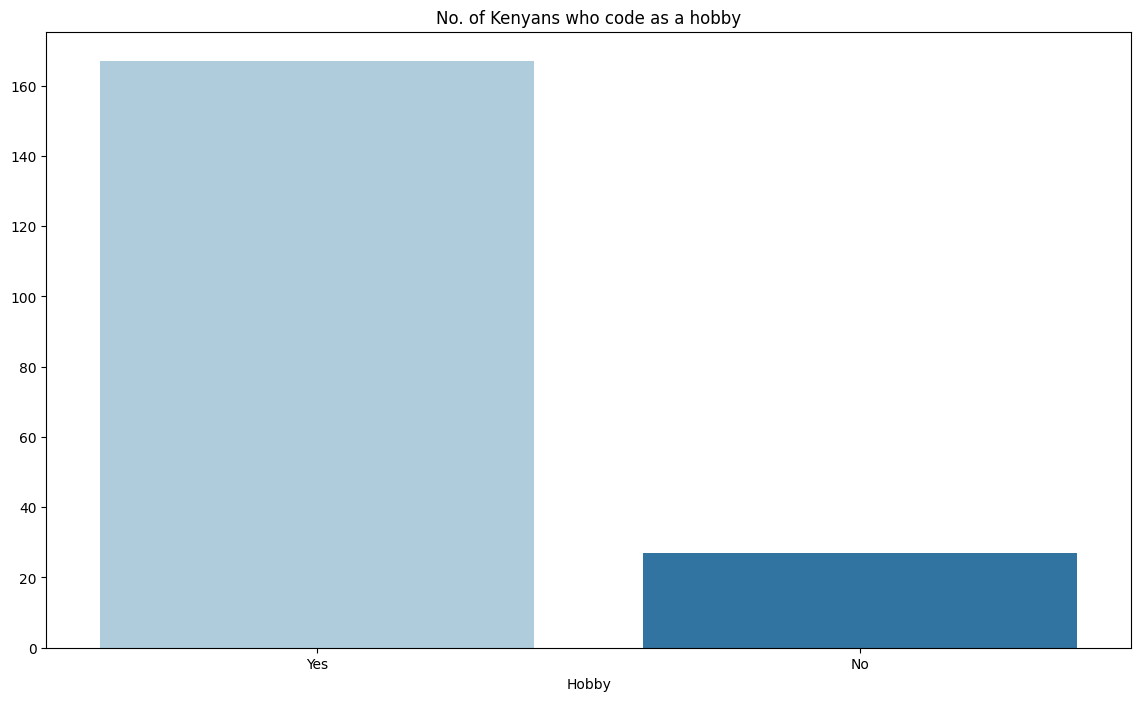

In [104]:
plot_categorical_count(dfKenya, 'Hobby', title='No. of Kenyans who code as a hobby')

Approximately 160 Kenyans code as a hobby.

<h2>Open source contributor</h2>

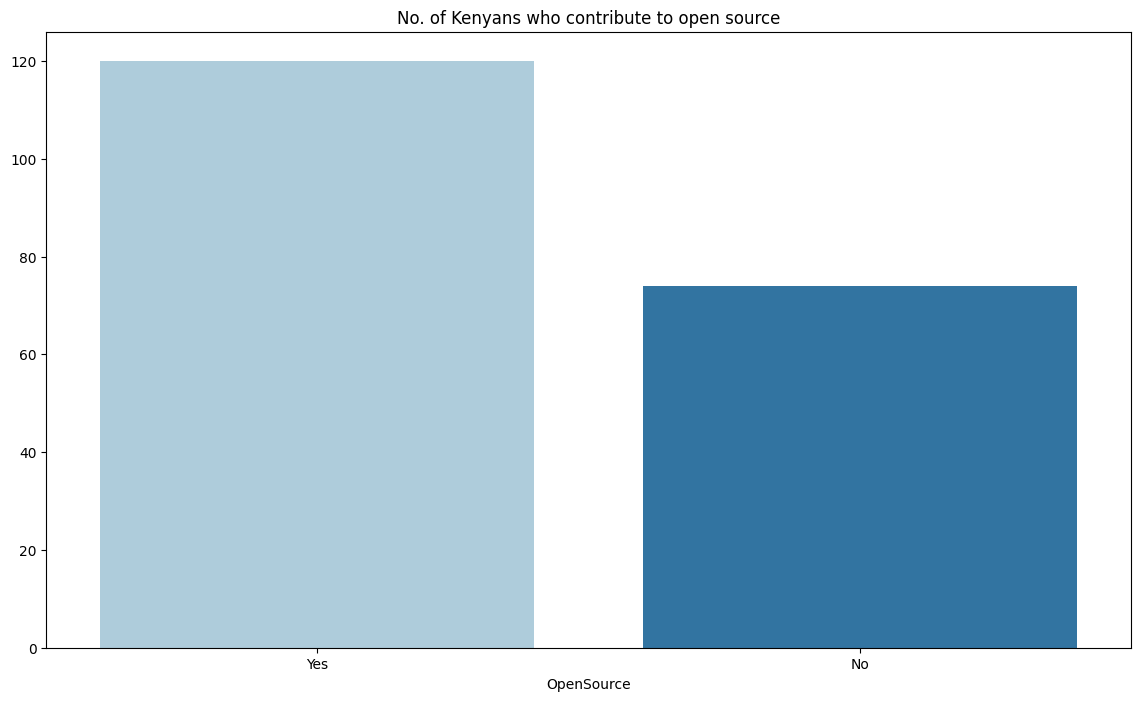

In [105]:
plot_categorical_count(dfKenya, 'OpenSource', title='No. of Kenyans who contribute to open source')

About 120 Kenyans contribute to open source.

<h2>Does coding as a hobby affect contributing to Open Source ??</h2>

<Axes: xlabel='Hobby', ylabel='count'>

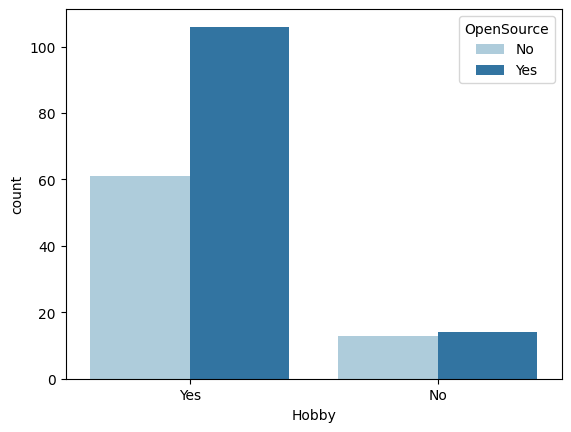

In [107]:
plt.figsize=(14,8)
sns.countplot(data=dfKenya, x='Hobby', hue='OpenSource', palette='Paired')

Those who code as a hobby are likely to contribute to open source.

<h2>Student or not</h2>

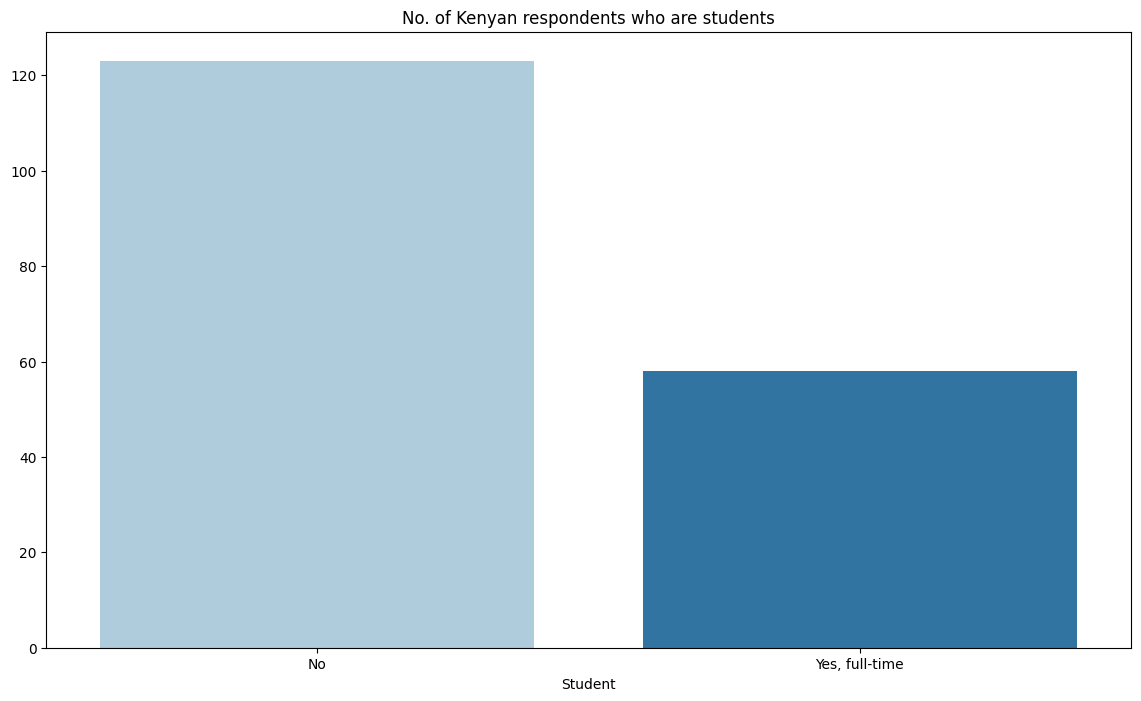

In [109]:
plot_categorical_count(dfKenya, 'Student', title='No. of Kenyan respondents who are students')

Majority of Kenyan respondents are not students.

<h2>Employment status</h2>

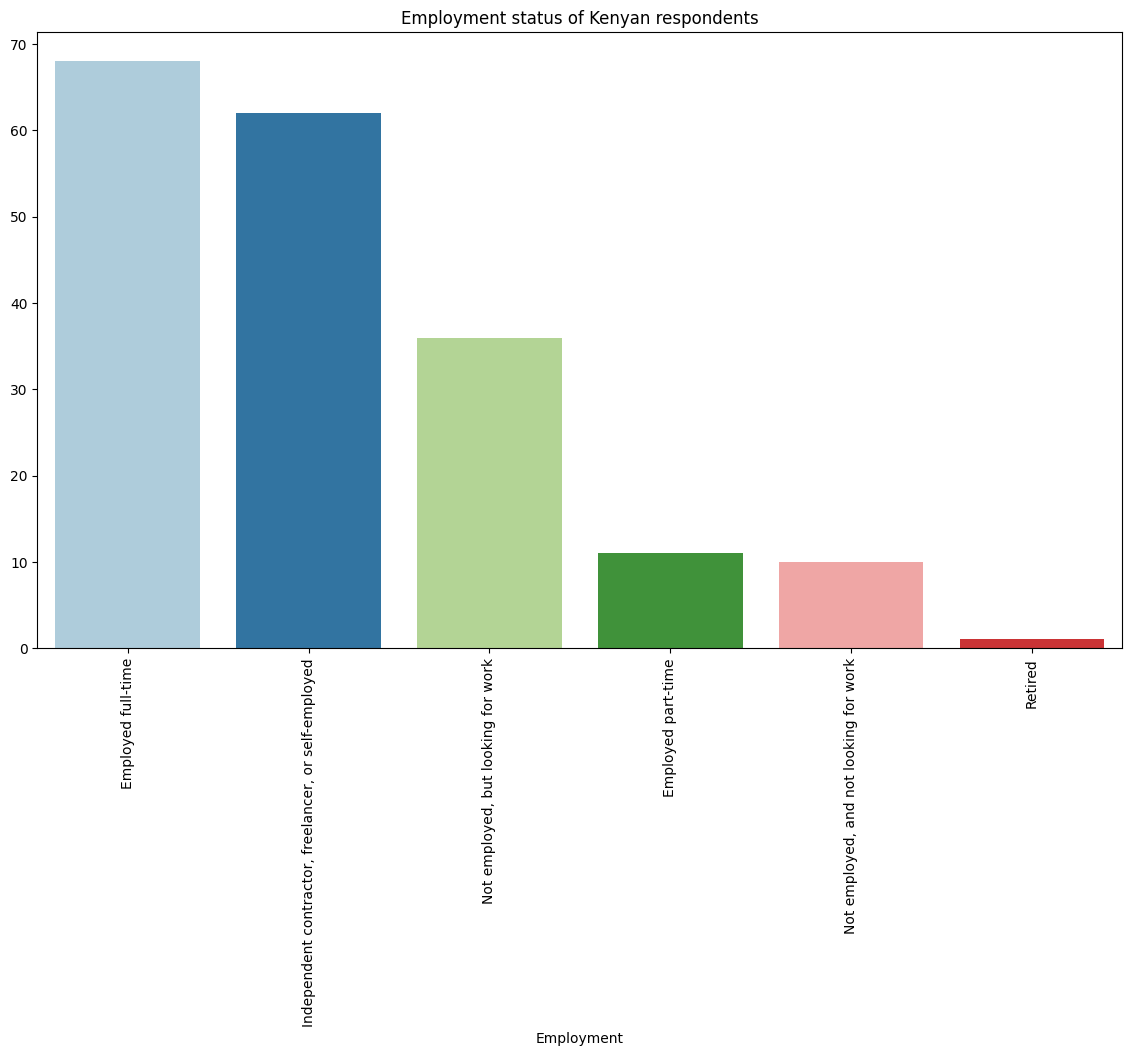

In [112]:
plot_categorical_count(dfKenya, 'Employment', title='Employment status of Kenyan respondents', limit=6, xtick_rotation='vertical')

Majority of Kenyan respondents work fulltime.

<h2>Gender</h2>

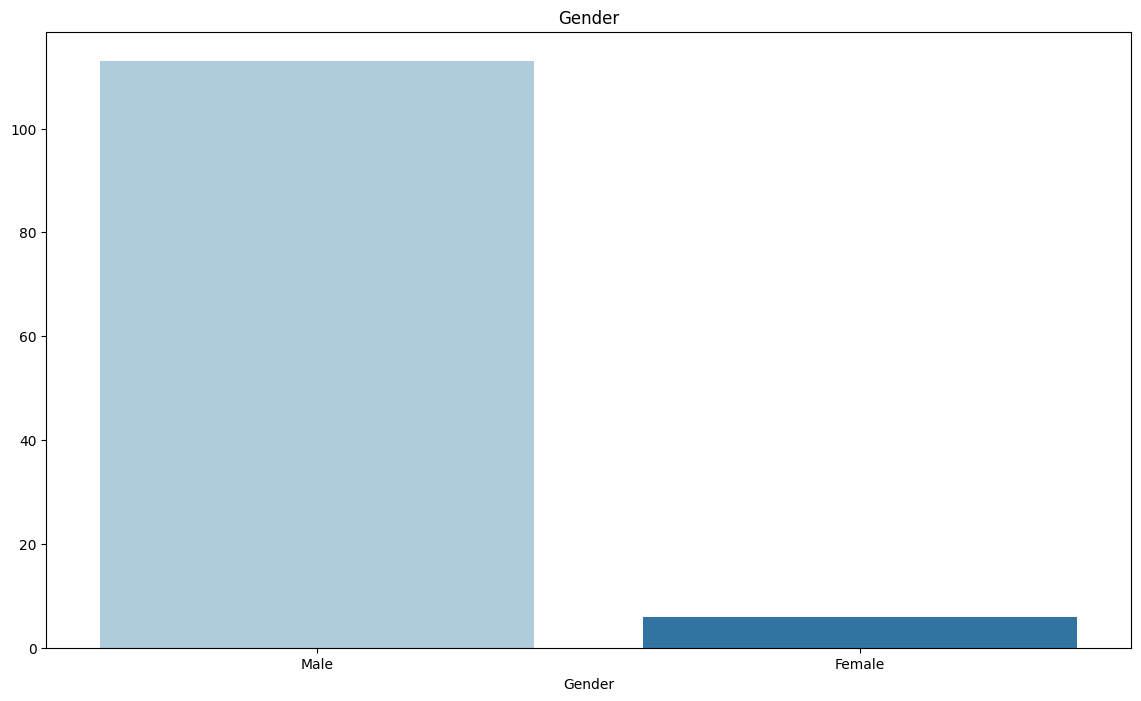

In [113]:
plot_categorical_count(dfKenya, 'Gender', title='Gender')

Majority of Kenyan respondents are male.

<h2>Developer Wake up Time</h2>

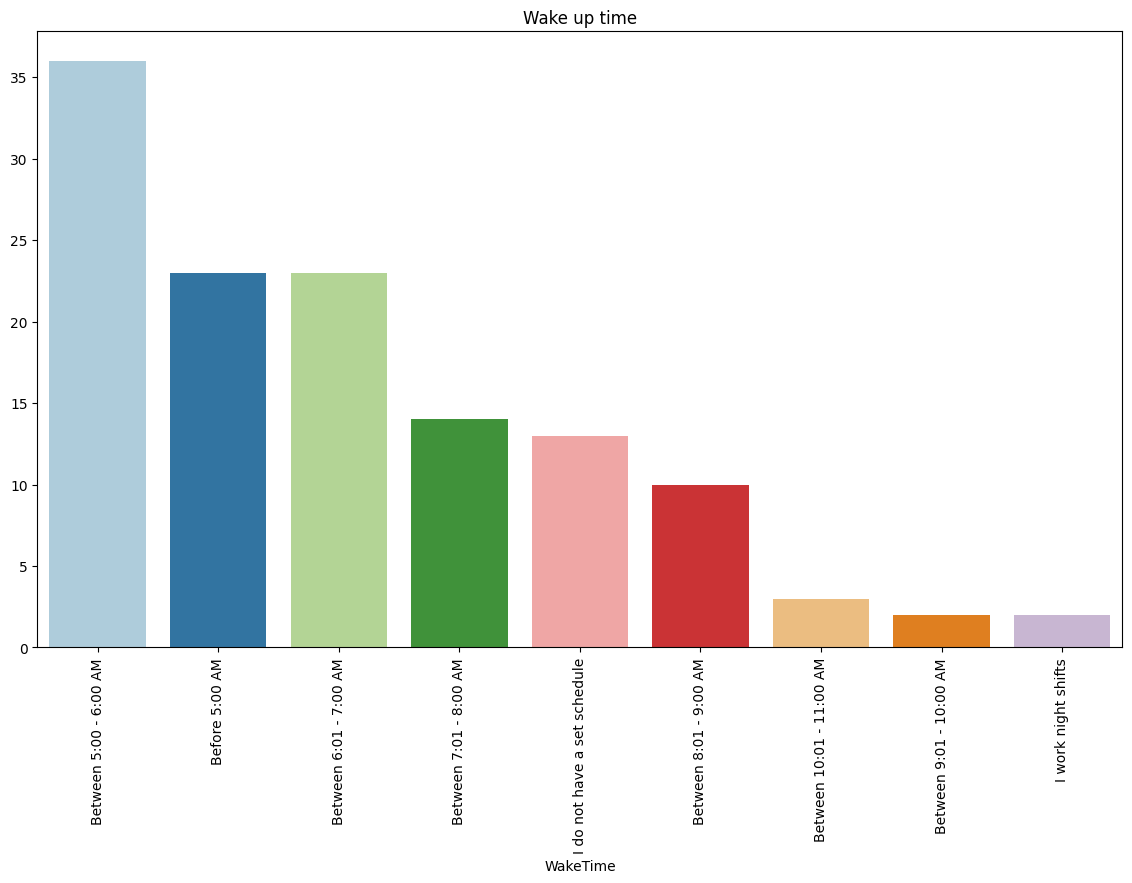

In [114]:
plot_categorical_count(dfKenya, 'WakeTime', title='Wake up time', limit=11, xtick_rotation='vertical')

Majority of Kenyan respondents wake up between 5am and 6am.

<h2>Bachelor degree</h2>

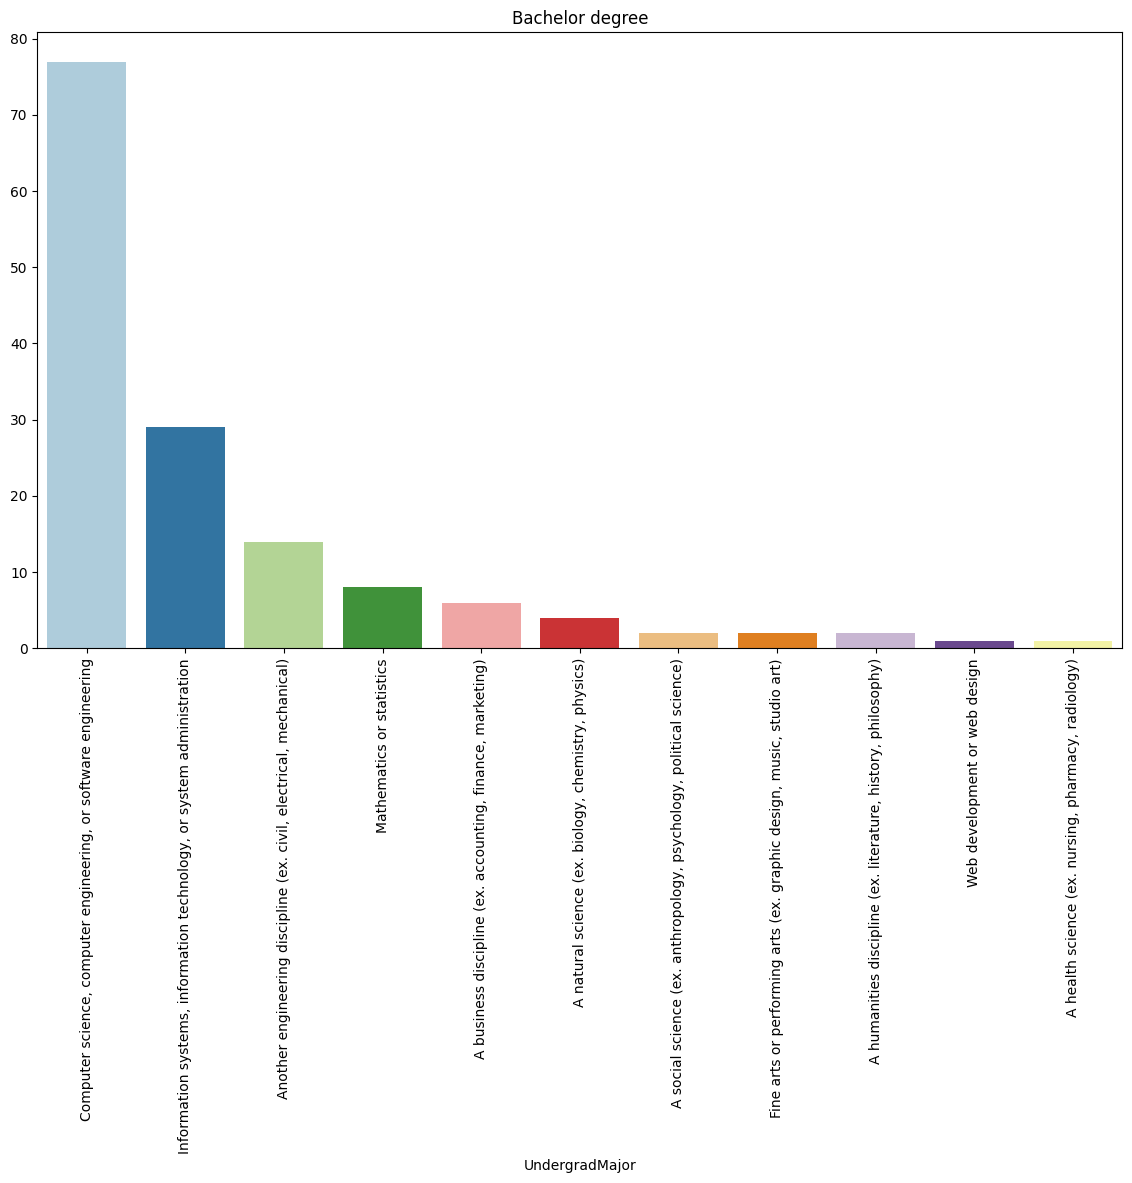

In [115]:
plot_categorical_count(dfKenya, 'UndergradMajor', 'Bachelor degree', limit=100, xtick_rotation='vertical')

Majority of Kenyan respondents have a bachelor's degree in computer science and IT.

<h2>Job Satisfaction</h2>

Text(0.5, 1.0, 'Number of respondents satisfied with their jobs')

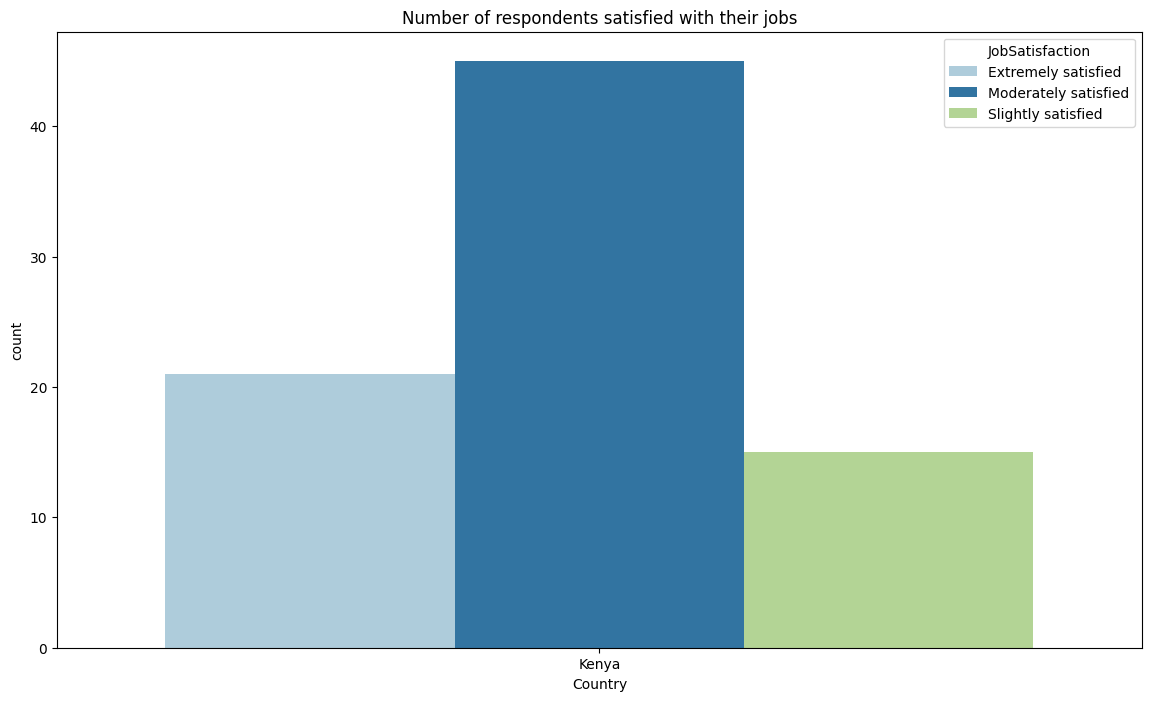

In [117]:
criteria1 = dfKenya['JobSatisfaction'] == 'Extremely satisfied'
criteria2 = dfKenya['JobSatisfaction'] == 'Moderately satisfied'
criteria3 = dfKenya['JobSatisfaction'] == 'Slightly satisfied'
final_criteria = criteria1 | criteria2 |criteria3

data = dfKenya[final_criteria]

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='Country', hue='JobSatisfaction', palette='Paired')
plt.title('Number of respondents satisfied with their jobs')

<h2>Career Satisfaction</h2>

Text(0.5, 1.0, 'Number of respondents satisfied with their careers')

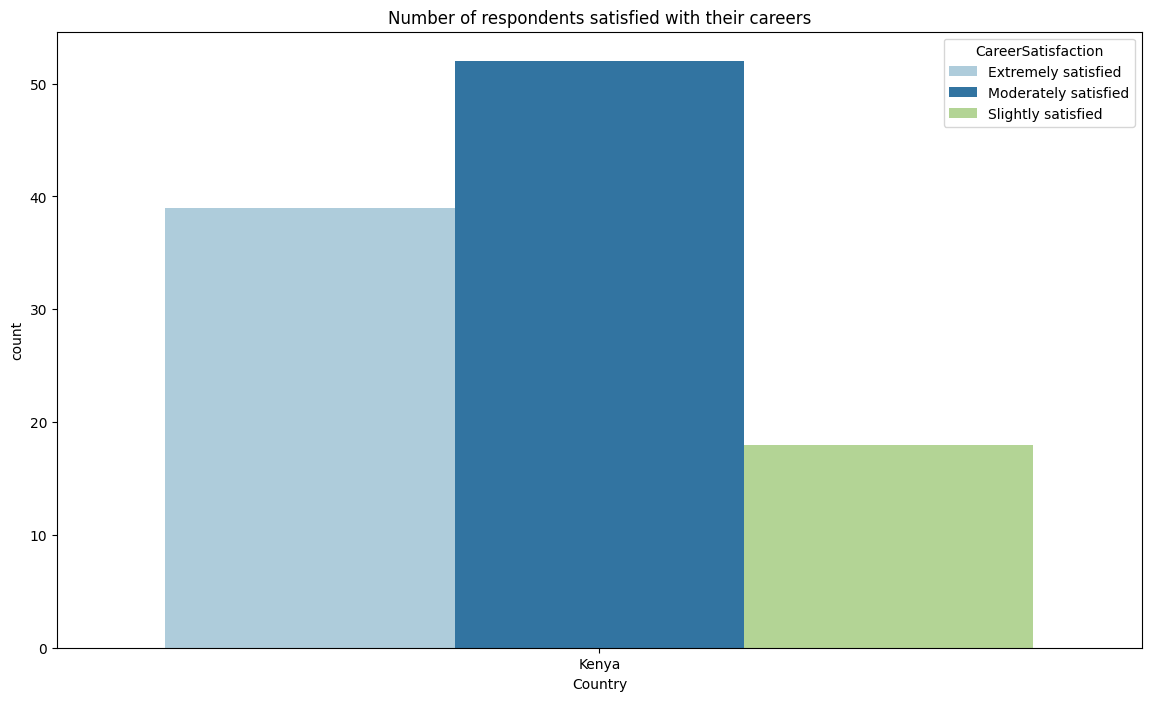

In [118]:
criteria1 = dfKenya['CareerSatisfaction'] == 'Extremely satisfied'
criteria2 = dfKenya['CareerSatisfaction'] == 'Moderately satisfied'
criteria3 = dfKenya['CareerSatisfaction'] == 'Slightly satisfied'
final_criteria = criteria1 | criteria2 |criteria3

data = dfKenya[final_criteria]

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='Country', hue='CareerSatisfaction', palette='Paired')
plt.title('Number of respondents satisfied with their careers')

<h2>Salaries</h2>

Text(0.5, 1.0, 'Distribution of salaries in the top 10 countries')

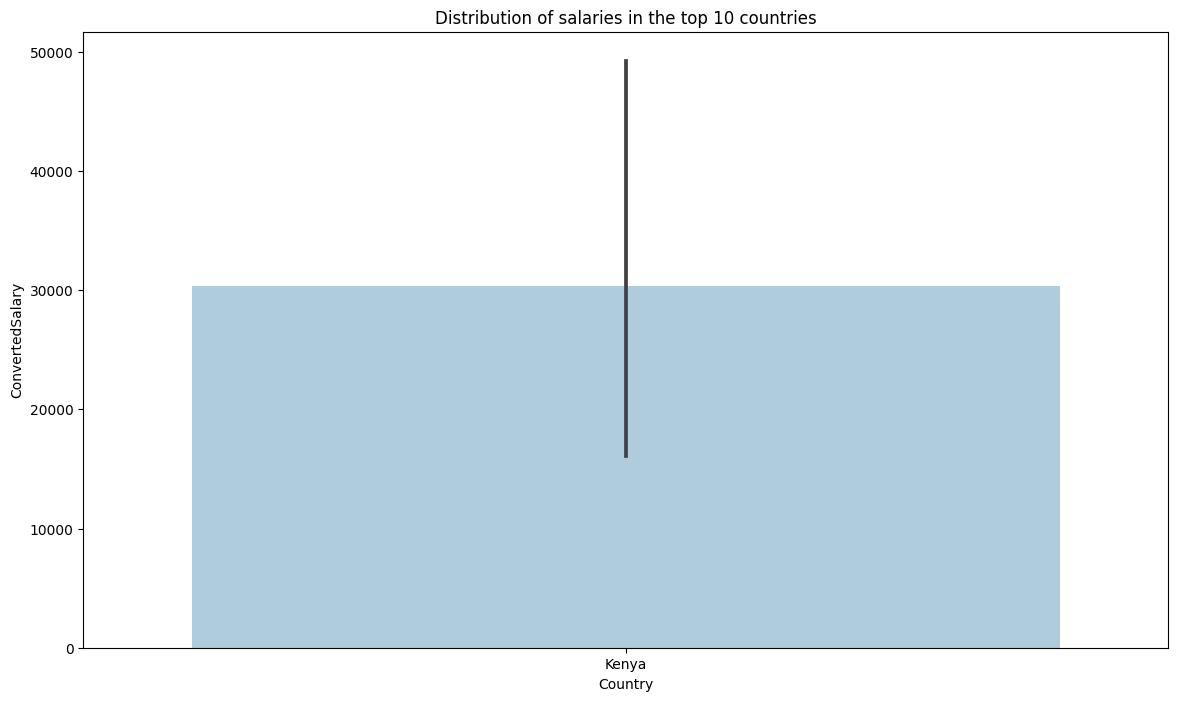

In [123]:
plt.figure(figsize=(14,8))
data = dfKenya
#sns.boxplot(data=data, x='ConvertedSalary', y='Country', palette='Paired')
sns.barplot(data=data, x='Country', y='ConvertedSalary', palette='Paired')
plt.title('Distribution of salaries in the top 10 countries')

<h2>ProductivityTime</h2>

Text(0.5, 1.0, 'Time Fully Productive')

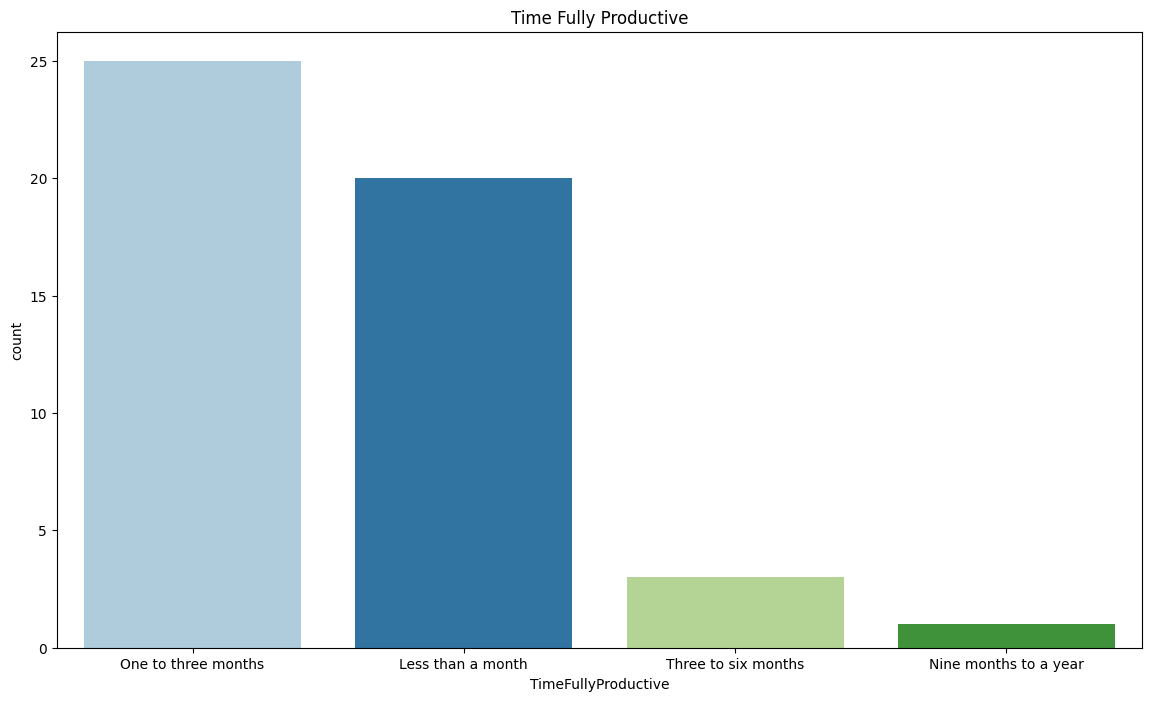

In [136]:
data=dfKenya

fig, ax = plt.subplots(1, 1, figsize=(14,8))

sns.countplot(data=data, x='TimeFullyProductive', ax=ax, palette='Paired', order=data['TimeFullyProductive'].value_counts().index)
plt.title('Time Fully Productive')